<a href="https://colab.research.google.com/github/apoorv098/StateWise-analysis-of-M.Tech-students-at-IIITD/blob/master/State_wise_analysis_of_M_Tech_applicants_IIITD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessay libraries
!pip install geopandas
!pip install descartes
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# mounting google drive with colab
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# reading data and displaying some data
df = pd.read_excel("M.Tech_list.xlsx")
df

*A Shapefile is a digital vector storage format for storing geometric location and associated attribute information.*

Download shapefile (India) from [here](https://map.igismap.com/share-map/export-layer/Indian_States/06409663226af2f3114485aa4e0a23b4)

**Note:** Extract all the shapefiles in single folder and upload the folder to your google drive. Also, ensure the there is no typo in the spelling of state names otherwise that state will not be displayed on the map. For instance, Delhi should be written as "NCT of Delhi" in your dataset. So, it is advised to do necessary preprocessing of data beforehand.


In [27]:
shapefile = "/content/gdrive/My Drive/maps/Indian_States.shp"
map_df = gpd.read_file(shapefile)
map_df.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


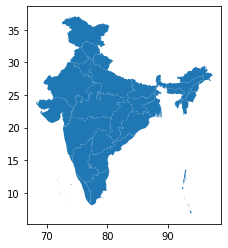

In [28]:
# Plot map
map_df.plot()

In [ ]:
# merging data frames together
merge = map_df.set_index('st_nm').join(df.set_index('state'))
merge

In [30]:
# check for NaN row
merge.isna().sum()

geometry      0
Count_app    14
dtype: int64

In [31]:
# Drop any NaN row
merge.dropna(inplace = True)
print(merge)

                                                           geometry  Count_app
st_nm                                                                         
Assam             MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...        1.0
Bihar             MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...        8.0
Chhattisgarh      POLYGON ((83.33532 24.09885, 83.35346 24.09627...        6.0
Gujarat           MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...        6.0
Haryana           POLYGON ((76.85065 30.87512, 76.86594 30.86691...        3.0
Himachal Pradesh  POLYGON ((76.79634 33.25490, 76.80351 33.25275...        1.0
Jammu & Kashmir   POLYGON ((74.73451 37.02068, 74.73647 37.01937...        2.0
Jharkhand         POLYGON ((87.60582 25.31512, 87.61279 25.31184...        1.0
Karnataka         MULTIPOLYGON (((74.69694 13.32782, 74.69562 13...        1.0
Kerala            POLYGON ((74.99575 12.79227, 75.00006 12.78777...        2.0
Madhya Pradesh    MULTIPOLYGON (((74.17932 22.39059,

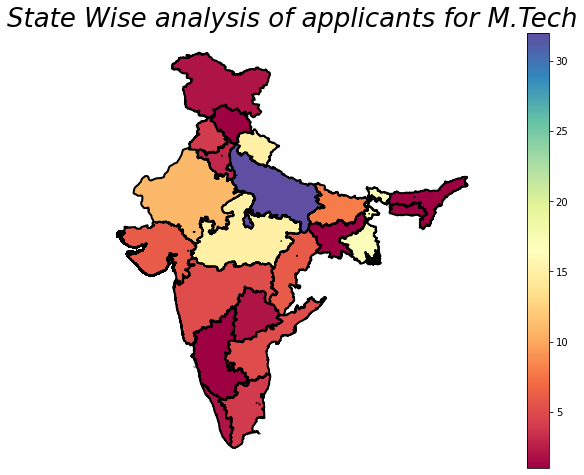

In [32]:
# Plotting our data on the map
figure , ax = plt.subplots(1, figsize=(15, 8))
ax.axis('off')
ax.set_title('State Wise analysis of applicants for M.Tech', fontdict={'fontsize': '26', 'fontweight' : '3', 'fontstyle': 'italic'})
merge.plot(column ='Count_app', cmap='Spectral', linewidth = 2 , ax=ax, edgecolor='black', legend = True)

# Analysis:
   

1.   Maximum number of applicants are from Delhi
2.   States such as Jammu & Kashmir, Himachal Pradesh, Assam contributes very less, to the overall number of applicants.



In [36]:
# save map
figure.savefig("state wise.png", dpi=100)